In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import os
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [8]:
# Đọc dữ liệu từ tệp CSV vào DataFrame
data = pd.read_csv('preprocessed_data.csv')

In [9]:
# Chọn các đặc trưng và nhãn
X = data[['size', 'rooms','category_name','area_name']]
y = data['price'] # Giá là nhãn cần dự đoán

In [10]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Khởi tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeRegressor(random_state=1)

In [12]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

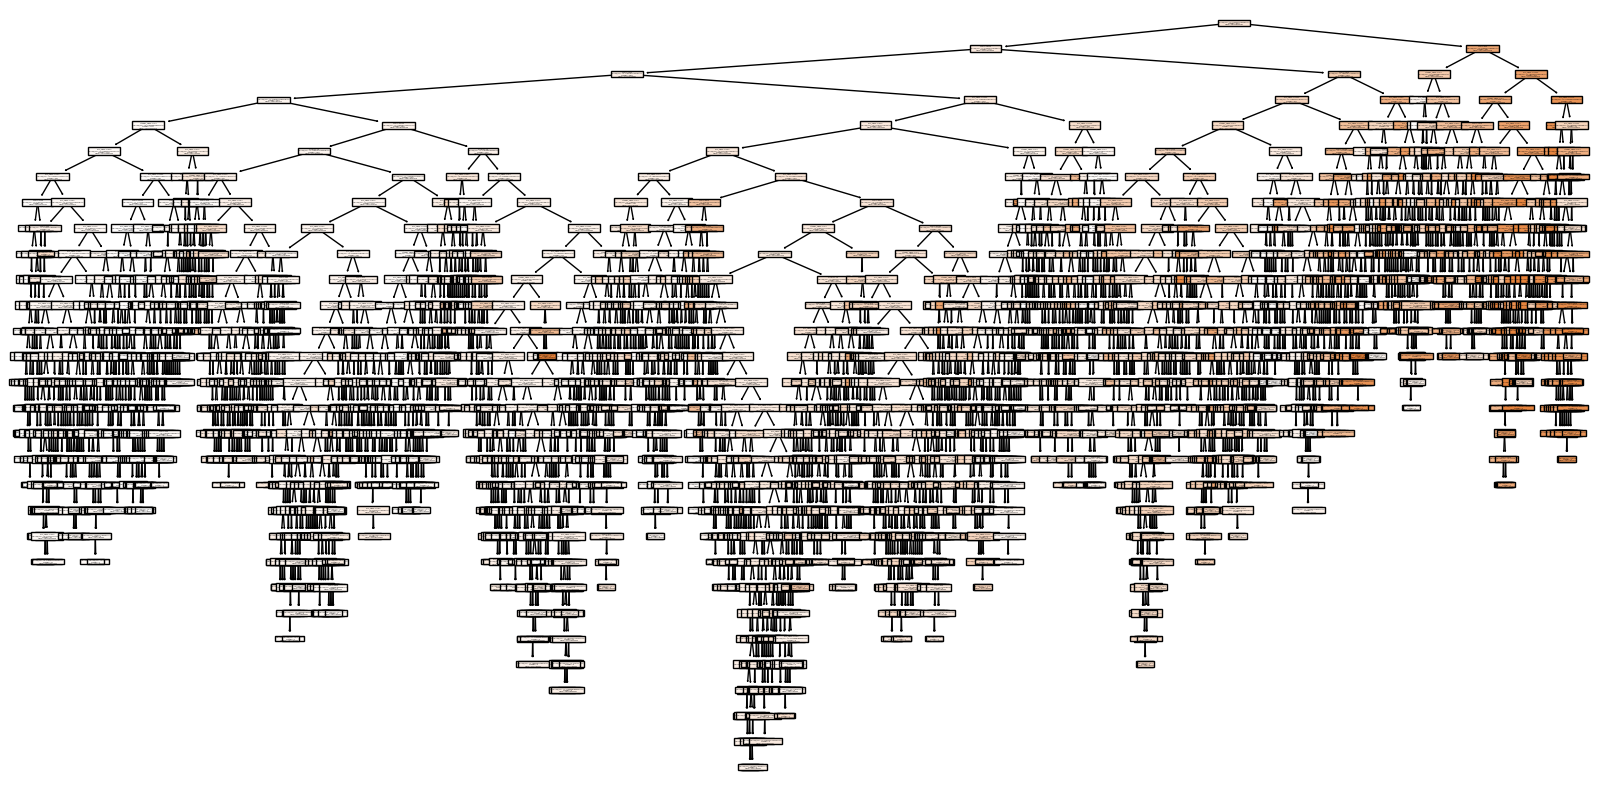

In [13]:


# Vẽ cây quyết định
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [18]:

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
test_score = model.score(X_test, y_test)
print("Độ chính xác của mô hình:", test_score)

Độ chính xác của mô hình: 0.6924310603175494


In [26]:
#Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán MAE, MAPE và MSE
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Hiển thị kết quả
print("Mean Absolute Error (MAE) trên tập kiểm tra:", mae)
print("Mean Absolute Percentage Error (MAPE) trên tập kiểm tra:", mape)
print("Mean Squared Error (MSE) trên tập kiểm tra:", mse)

Mean Absolute Error (MAE) trên tập kiểm tra: 936177843.4271508
Mean Absolute Percentage Error (MAPE) trên tập kiểm tra: 0.2714435876481918
Mean Squared Error (MSE) trên tập kiểm tra: 3.898850818023909e+18


Mean Absolute Error (MAE): MAE có giá trị khoảng 936,177,843.43. Giá trị này cho biết trung bình sai số tuyệt đối giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra là khá lớn. Cụ thể, trung bình sai số tuyệt đối của mô hình so với giá trị thực tế là khoảng 936 tỷ đồng. Điều này cho thấy mô hình không dự đoán chính xác giá trị bán nhà trên tập kiểm tra.

Mean Absolute Percentage Error (MAPE): MAPE có giá trị khoảng 0.27%, cho biết trung bình tỷ lệ phần trăm của sai số tuyệt đối so với giá trị thực tế trên tập kiểm tra là khá nhỏ. Các sai số tuyệt đối trung bình của mô hình chỉ chiếm khoảng 0.27% so với giá trị thực tế. Tuy nhiên, MAPE cũng phản ánh một phần của sai số trong dự đoán.

Mean Squared Error (MSE): MSE có giá trị khoảng 3.90e+18 (gần 4 tỷ tỷ đồng). MSE là một giá trị rất lớn, cho thấy mức độ chênh lệch giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra là rất cao. Điều này có thể đồng nghĩa với việc mô hình không tốt trong việc dự đoán giá trị bán nhà trên tập kiểm tra.

Dựa trên các thông số trên, mô hình của bạn hiện đang gặp phải các vấn đề trong việc dự đoán giá trị bán nhà trên tập kiểm tra. Cần thiết phải tiến hành phân tích sâu hơn và cải thiện mô hình, có thể bằng cách tinh chỉnh siêu tham số, sử dụng các phương pháp đào tạo phức tạp hơn, hoặc thu thập thêm dữ liệu đa dạng hơn để cải thiện hiệu suất của mô hình.